Lo cargamos desde un pickle para no perder los tipos de datos de las columnas, puesto que con csv los perderiamos

In [3]:
import polars as pl
import pickle


with open("datos_cleaned_grouped.pkl", "rb") as file:
    df = pickle.load(file)

df = df.sort("InvoiceDate")
df


InvoiceDate,TotalSales,weekday,is_holiday,is_month_start,is_month_end,quarter_num,Lag_1,Lag_7,Lag_30,MA_7,MA_14,MA_30
date,f64,i8,i64,i8,i8,i8,f64,f64,f64,f64,f64,f64
2010-12-01,26604.56,3,0,1,0,4,21458.16,12591.23,36867.04,17899.431429,15234.28,17913.767333
2010-12-02,23203.33,4,0,1,0,4,11153.43,3981.37,13652.66,13151.775714,13674.501429,15200.728667
2010-12-05,20738.69,7,0,1,0,4,16977.64,22369.06,10370.63,17773.847143,16847.534286,15992.225333
2010-12-07,25345.38,2,0,1,0,4,11789.36,13215.98,35696.84,18000.218571,16411.863571,16612.621667
2010-12-08,26379.94,3,0,1,0,4,22369.06,12371.26,19162.26,17922.461429,15320.713571,15808.637667
…,…,…,…,…,…,…,…,…,…,…,…,…
2011-12-05,45057.32,1,0,1,0,4,15855.32,35696.84,7439.5,17321.857143,20623.167143,18314.883
2011-12-06,26898.4,2,0,1,0,4,3321.05,15938.83,4937.29,16671.73,18132.44,17275.171667
2011-12-07,27847.03,3,0,1,0,4,15285.24,12741.68,11251.67,17794.714286,17413.577143,17650.127333


In [4]:
FEATURES = ["weekday", "is_holiday", "is_month_start", "is_month_end", "quarter_num", 
            "Lag_1", "Lag_7", "Lag_30", "MA_7", "MA_14", "MA_30"]
TARGET = "TotalSales"

train_size = int(len(df) * 0.8)
train_df, test_df = df[:train_size], df[train_size:]

X_train, y_train = train_df[FEATURES], train_df[TARGET]
X_test, y_test = test_df[FEATURES], test_df[TARGET]

XGBREGRESSOR

In [5]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = xgb.XGBRegressor(
    objective="reg:squarederror", 
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=11, 
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


RANDOMFOREST

In [25]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=11, 
    random_state=42, 
    n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([21403.3469    , 11001.2391    , 22937.08773962, 17592.41292   ,
       22660.32556684, 23928.86256487, 21843.95768154, 10818.6221    ,
       20720.39367876, 19510.16338197, 21751.28121184, 21615.01331184,
       19612.558925  , 15794.977     , 12068.03486667, 15828.45737389,
       13215.22271238, 16494.49878889, 13503.9464    ,  8174.9708    ,
       13946.76815   , 21912.65395835, 20805.6959903 , 22228.64762598,
       19893.6726    ,  9955.8184    , 20473.18522197, 22339.56101765,
       21449.137     , 25836.15796931, 20118.66304167, 15214.07835   ,
       21348.75746765, 21775.74330628, 19700.01112598, 22268.22776184,
       18204.13853333,  9228.4713    , 13561.52000833, 14254.77678333,
       16642.93965   , 14208.24732778, 15336.926125  ,  8407.968     ,
       14704.17698056, 17249.13465   , 14562.69388333, 27140.31674709,
       25082.54989431, 10292.9059    , 22362.61083765, 21716.47758667,
       23485.67820098, 27775.09240098, 19886.54663333])

ARIMA

In [21]:
import statsmodels.api as sm
df_arima = df.to_pandas()

df_arima["InvoiceDate"] = pd.to_datetime(df_arima["InvoiceDate"])  
df_arima = df_arima.sort_values("InvoiceDate") 
df_arima.set_index("InvoiceDate", inplace=True)  
serie_ventas = df_arima["TotalSales"]


train_size = int(len(serie_ventas) * 0.8)
train, test = serie_ventas[:train_size], serie_ventas[train_size:]


p, d, q = 5, 1, 2 
model= sm.tsa.ARIMA(train, order=(p, d, q))
model_fitted = model.fit()

y_pred = model_fitted.forecast(steps=len(test))
y_pred =  y_pred.to_numpy()

c:\Users\Pelicano\Desktop\Master IA\Lab\lab_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Pelicano\Desktop\Master IA\Lab\lab_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Pelicano\Desktop\Master IA\Lab\lab_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Pelicano\Desktop\Master IA\Lab\lab_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction resul

array([27305.56808639, 24711.047797  , 24367.31178552, 24546.92623379,
       24941.55035519, 25588.83001795, 25538.80019712, 25428.66936321,
       25341.36611689, 25270.06369062, 25272.10186676, 25310.41769479,
       25324.5308904 , 25331.01816836, 25328.51143929, 25321.50780545,
       25318.58061918, 25318.83054331, 25319.65826559, 25320.80871144,
       25321.24404195, 25321.04516278, 25320.80328535, 25320.64635627,
       25320.60029255, 25320.6555278 , 25320.70835729, 25320.72792352,
       25320.72731053, 25320.71555313, 25320.70590706, 25320.70402226,
       25320.70572115, 25320.70803392, 25320.70947584, 25320.70951935,
       25320.70898301, 25320.70856214, 25320.70839228, 25320.70844138,
       25320.70856182, 25320.70863174, 25320.70864304, 25320.70862419,
       25320.70860142, 25320.7085914 , 25320.70859279, 25320.7085977 ,
       25320.70860148, 25320.70860257, 25320.70860178, 25320.70860073,
       25320.70860018, 25320.70860014, 25320.70860036])

{'MAPE (Mean Absolute Percentage Error)': np.float64(32.50198700471906), 'Precisión del Modelo (%)': np.float64(67.49801299528093)}


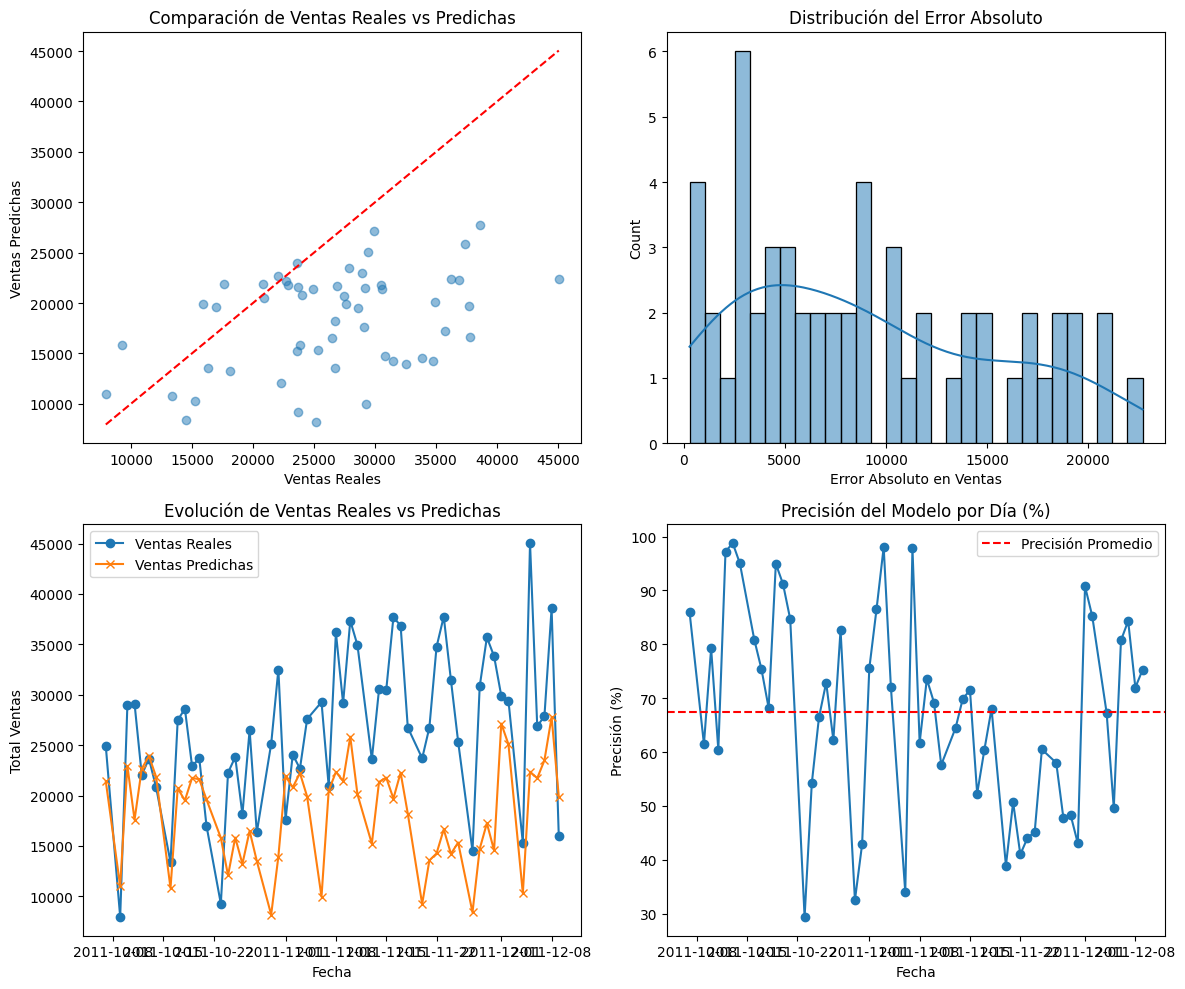

{'MAE (Mean Absolute Error)': np.float64(8990.385080111068),
 'RMSE (Root Mean Squared Error)': np.float64(10969.137686671393),
 'MAPE (Mean Absolute Percentage Error)': np.float64(32.50198700471906),
 'Precisión Promedio del Modelo (%)': np.float64(67.49801299528093)}

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred) 
    mask = (y_true != 0) & (~np.isnan(y_true)) & (~np.isnan(y_pred))  # Evita errores
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100



mape = mean_absolute_percentage_error(y_test, y_pred)
accuracy = 100 - mape  


metricas = {
    "MAPE (Mean Absolute Percentage Error)": mape,
    "Precisión del Modelo (%)": accuracy
}

print(metricas)

df_results = pd.DataFrame({
    "Fecha": test_df["InvoiceDate"],
    # "País": test_df["Country"],
    "Ventas Reales": y_test,
    "Ventas Predichas": y_pred,
    "Error Absoluto": np.abs(y_test - y_pred),
    "Error Relativo (%)": np.abs((y_test - y_pred) / y_test) * 100
})


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
accuracy = 100 - mape  


fig, ax = plt.subplots(2, 2, figsize=(12, 10))


ax[0, 0].scatter(y_test, y_pred, alpha=0.5)
ax[0, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
ax[0, 0].set_xlabel("Ventas Reales")
ax[0, 0].set_ylabel("Ventas Predichas")
ax[0, 0].set_title("Comparación de Ventas Reales vs Predichas")


sns.histplot(df_results["Error Absoluto"], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title("Distribución del Error Absoluto")
ax[0, 1].set_xlabel("Error Absoluto en Ventas")


df_results = df_results.sort_values("Fecha")
ax[1, 0].plot(df_results["Fecha"], df_results["Ventas Reales"], label="Ventas Reales", marker='o')
ax[1, 0].plot(df_results["Fecha"], df_results["Ventas Predichas"], label="Ventas Predichas", marker='x')
ax[1, 0].set_title("Evolución de Ventas Reales vs Predichas")
ax[1, 0].set_xlabel("Fecha")
ax[1, 0].set_ylabel("Total Ventas")
ax[1, 0].legend()


df_results["Precisión (%)"] = np.clip(100 - df_results["Error Relativo (%)"], 0, 100)
ax[1, 1].plot(df_results["Fecha"], df_results["Precisión (%)"], marker='o', linestyle='-')
ax[1, 1].set_title("Precisión del Modelo por Día (%)")
ax[1, 1].set_xlabel("Fecha")
ax[1, 1].set_ylabel("Precisión (%)")
ax[1, 1].axhline(y=accuracy, color='red', linestyle='--', label="Precisión Promedio")
ax[1, 1].legend()

plt.tight_layout()
plt.show()


metricas = {
    "MAE (Mean Absolute Error)": mae,
    "RMSE (Root Mean Squared Error)": rmse,
    "MAPE (Mean Absolute Percentage Error)": mape,
    "Precisión Promedio del Modelo (%)": accuracy
}

metricas


In [24]:
print(np.std(y_pred))


332.9973667117908


Ahora filtramos por el limite superior

In [ ]:
df.filter(df["TotalSales"] > 33.3)

InvoiceDate,TotalSales,weekday,is_holiday,is_month_start,is_month_end,quarter_num,Lag_1,Lag_7,Lag_30,MA_7,MA_14,MA_30
date,f64,i8,i64,i8,i8,i8,f64,f64,f64,f64,f64,f64
2010-12-01,26604.56,3,0,1,0,4,21458.16,12591.23,36867.04,17899.431429,15234.28,17913.767333
2010-12-02,23203.33,4,0,1,0,4,11153.43,3981.37,13652.66,13151.775714,13674.501429,15200.728667
2010-12-05,20738.69,7,0,1,0,4,16977.64,22369.06,10370.63,17773.847143,16847.534286,15992.225333
2010-12-07,25345.38,2,0,1,0,4,11789.36,13215.98,35696.84,18000.218571,16411.863571,16612.621667
2010-12-08,26379.94,3,0,1,0,4,22369.06,12371.26,19162.26,17922.461429,15320.713571,15808.637667
…,…,…,…,…,…,…,…,…,…,…,…,…
2011-12-05,45057.32,1,0,1,0,4,15855.32,35696.84,7439.5,17321.857143,20623.167143,18314.883
2011-12-06,26898.4,2,0,1,0,4,3321.05,15938.83,4937.29,16671.73,18132.44,17275.171667
2011-12-07,27847.03,3,0,1,0,4,15285.24,12741.68,11251.67,17794.714286,17413.577143,17650.127333


Las acciones ejecutadas sobre el dataset como proceso de transformación de datos, justificando las técnicas utilizadas y las decisiones tomadas.

Las acciones ejecutadas sobre el dataset para crear los conjuntos de entrenamiento, validación y test, justificando las decisiones tomadas.
El entrenamiento de, al menos, un modelo de regresión, explicando la implementación realizada y mostrando claramente el resultado obtenido.


el dia de la semana puede ser util para detectrar patrones semanales
detectar si es dia festivo